In [1]:
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *
import scienceplots
plt.style.use(['science', 'notebook'])

In [26]:
multwavs = [22587.95,22593.85,22613.8,22634,22659.4,22680.5,22691.75,22703,22713.25,22773.25,22783.3,22789.35,22915.25,23028.35,23067.25,23655.35,
            22920.00, 23292.60]

outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21-2/Oct-24-2024-13-55-40_0.28258010476482254_LTE_O_1D"

In [27]:
config_dict = load_output_data(outpath)

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [28]:
output_results_pd_df = config_dict["output_file_df"] 

In [30]:
output_results_pd_df

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,O_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,ASAS-RCB-21.txt,23023.50,23022.3,23024.7,999999.0000,0.0,1.2244,7.0,5.0,0.0,999999.990000,9.999990e+08,10000000,0
1,ASAS-RCB-21.txt,23072.00,23071.0,23073.0,-0.7799,0.0,0.2873,7.0,5.0,0.0,15.440323,7.777781e+02,0,0
2,ASAS-RCB-21.txt,23118.20,23117.3,23119.1,999999.0000,0.0,1.2191,7.0,5.0,0.0,999999.990000,9.999990e+08,10000000,0
3,ASAS-RCB-21.txt,23274.60,23273.6,23275.6,0.7613,0.0,-0.1368,7.0,5.0,0.0,15.833801,6.932620e+02,0,0
4,ASAS-RCB-21.txt,23295.50,23293.0,23298.0,-1.3260,0.0,0.0874,7.0,5.0,0.0,58.959228,1.335915e+03,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,ASAS-RCB-21.txt,23759.00,23757.5,23760.5,-0.6231,0.0,-0.0475,5.0,5.0,0.0,30.938918,6.058032e+02,0,0
68,ASAS-RCB-21.txt,24063.50,24062.6,24064.4,2.5000,0.0,-0.0686,5.0,5.0,0.0,71.764026,5.002907e+02,0,10000000
69,ASAS-RCB-21.txt,24283.60,24282.6,24284.6,0.8371,0.0,-0.3290,5.0,5.0,0.0,17.651591,4.059684e+02,0,0
70,ASAS-RCB-21.txt,24605.25,24604.0,24606.5,0.2167,0.0,0.0133,5.0,5.0,0.0,43.859343,6.418817e+02,0,0


In [31]:
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 30])
output_trimmed = output_trimmed.reset_index(drop=True)
output_trimmed_vmic = output_trimmed[~output_trimmed["wave_center"].isin(multwavs)]

In [32]:
output_trimmed_vmic

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,O_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,ASAS-RCB-21.txt,23072.000,23071.00,23073.0,-0.7799,0.0,0.2873,7.0,5.0,0.0,15.440323,777.7781,0,0
1,ASAS-RCB-21.txt,23274.600,23273.60,23275.6,0.7613,0.0,-0.1368,7.0,5.0,0.0,15.833801,693.2620,0,0
2,ASAS-RCB-21.txt,23304.500,23302.00,23307.0,0.7832,0.0,-0.1558,7.0,5.0,0.0,13.751591,1030.1285,0,0
3,ASAS-RCB-21.txt,23341.250,23339.50,23343.0,0.3609,0.0,-0.0761,7.0,5.0,0.0,27.494805,798.1074,0,0
4,ASAS-RCB-21.txt,23362.100,23360.70,23363.5,-0.6880,0.0,-0.1566,7.0,5.0,0.0,9.342851,829.8474,0,0
5,ASAS-RCB-21.txt,23373.000,23371.50,23374.5,-1.0434,0.0,-0.0052,7.0,5.0,0.0,17.079327,954.7522,0,0
6,ASAS-RCB-21.txt,23759.000,23757.50,23760.5,-0.6826,0.0,-0.1614,7.0,5.0,0.0,10.934494,644.6443,0,0
7,ASAS-RCB-21.txt,24063.500,24062.60,24064.4,2.5000,0.0,-0.1767,7.0,5.0,0.0,26.377345,507.4261,0,10000000
8,ASAS-RCB-21.txt,24283.600,24282.60,24284.6,0.8370,0.0,-0.3701,7.0,5.0,0.0,2.254640,417.4233,0,0
9,ASAS-RCB-21.txt,24605.250,24604.00,24606.5,-0.0439,0.0,-0.1342,7.0,5.0,0.0,10.419452,664.1641,0,0


5.0 0.0006106001781517664 3
6.0 0.00045045841690877594 8
7.0 0.0004262472820358806 11
8.0 0.000355753278816573 14


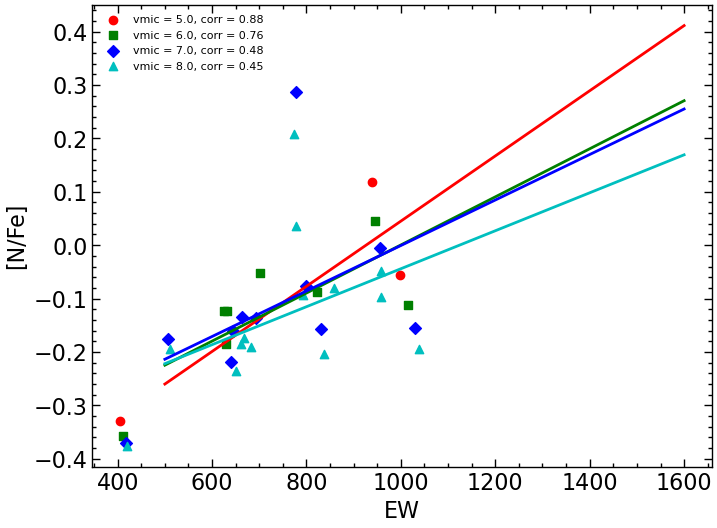

In [35]:
vmics = np.unique(output_trimmed_vmic["Microturb"].values)
cs = ['r', 'g', 'b', 'c', 'm', 'y']
markers = ['o', 's', 'D', '^', 'v', 'p']
for i in range(len(vmics)):
    vmic = vmics[i]
    output_vmic = output_trimmed_vmic[output_trimmed_vmic["Microturb"] == vmic]
    ews = np.array(output_vmic["ew"])
    nfes = np.array(output_vmic["O_Fe"])
    mean_nfe = np.mean(nfes)
    std_nfe = np.std(nfes)
    choose_idxs = np.where(np.abs(nfes - mean_nfe) < 5*std_nfe)
    choose_idxs = choose_idxs[0]
    choose_idxs2 = np.where(nfes[choose_idxs] > -10.0)
    choose_idxs2 = choose_idxs2[0]
    choose_idxs = choose_idxs[choose_idxs2]
    ews = ews[choose_idxs]
    nfes = nfes[choose_idxs]
    corr = np.corrcoef(ews,nfes)[0,1]
    corr = corr.round(2)
    plt.scatter(ews,nfes, c=cs[i], marker = markers[i], label = f"vmic = {vmics[i]}, corr = {corr}")
    m,c = np.polyfit(ews,nfes,1)
    x = np.linspace(500, 1600, 100)
    y = m*x + c
    print(vmics[i], m, len(nfes))
    plt.plot(x,y, c = cs[i])
    plt.legend(fontsize = 8)
    plt.ylabel("[N/Fe]")
    plt.xlabel("EW")

In [63]:
np.min(output_trimmed2['N_Fe'])

np.float64(0.9777)

In [72]:
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21-2/Oct-16-2024-00-22-14_0.1910654443745513_LTE_N_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 50])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [75]:
output_results_pd_df

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,N_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,ASAS-RCB-21.txt,22580.25,22578.5,22582.0,-1.0971,0.0,-0.2537,7.0,0.0000,0.0,252.498259,9.8995,10000,10011000
1,ASAS-RCB-21.txt,22632.75,22631.0,22634.5,0.9330,0.0,1.2008,7.0,5.0697,0.0,2.638169,764.3171,0,0
2,ASAS-RCB-21.txt,22828.00,22826.0,22830.0,-2.5000,0.0,-1.0000,7.0,3.7877,0.0,169.532586,174.5669,10000,10011000
3,ASAS-RCB-21.txt,22915.50,22913.5,22917.5,-0.8544,0.0,1.2443,7.0,5.6956,0.0,9.477321,701.3213,0,0


In [74]:
output_trimmed

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,N_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
1,ASAS-RCB-21.txt,22632.75,22631.0,22634.5,0.9330,0.0,1.2008,7.0,5.0697,0.0,2.638169,764.3171,0,0
3,ASAS-RCB-21.txt,22915.50,22913.5,22917.5,-0.8544,0.0,1.2443,7.0,5.6956,0.0,9.477321,701.3213,0,0


In [73]:
np.mean(output_trimmed['Macroturb'])

np.float64(5.38265)

In [93]:
np.mean(output_trimmed["Macroturb"]), np.std(output_trimmed["Macroturb"])

(np.float64(8.0), np.float64(0.0))

In [101]:
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21-2/Oct-16-2024-12-53-22_0.6538881836287115_LTE_C_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 4])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [102]:
output_results_pd_df

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,C_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,ASAS-RCB-21.txt,22743.35,22742.0,22744.7,0.4058,0.0,1.3378,7.0,5.4,0.0,4.481846,391.6736,0,0
1,ASAS-RCB-21.txt,22799.60,22798.0,22801.2,-2.5000,0.0,1.5803,7.0,5.4,0.0,7.194008,485.3102,0,10000000
2,ASAS-RCB-21.txt,22804.50,22802.0,22807.0,-1.2121,0.0,1.3898,7.0,5.4,0.0,3.889365,632.1619,0,0
3,ASAS-RCB-21.txt,22879.25,22877.0,22881.5,0.1061,0.0,1.4577,7.0,5.4,0.0,3.147584,715.3804,0,0


In [103]:
output_trimmed

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,C_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
2,ASAS-RCB-21.txt,22804.50,22802.0,22807.0,-1.2121,0.0,1.3898,7.0,5.4,0.0,3.889365,632.1619,0,0
3,ASAS-RCB-21.txt,22879.25,22877.0,22881.5,0.1061,0.0,1.4577,7.0,5.4,0.0,3.147584,715.3804,0,0


In [104]:
np.mean(output_trimmed['C_Fe'])+solar_abundances['C']

np.float64(9.98375)

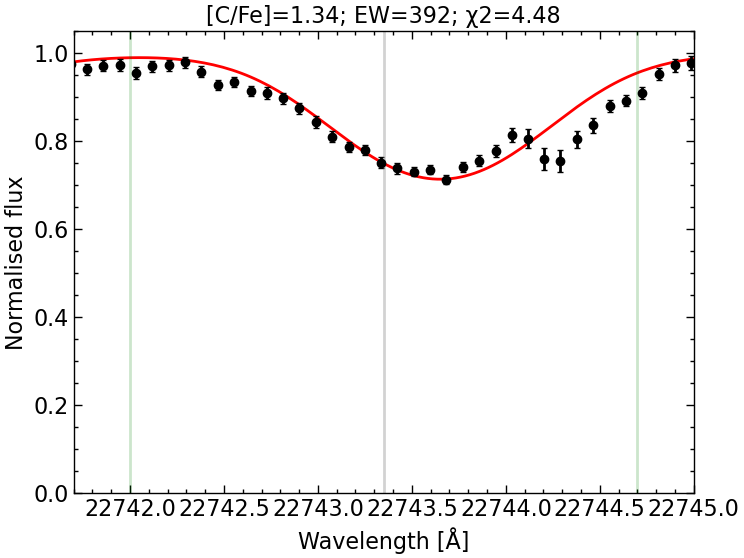

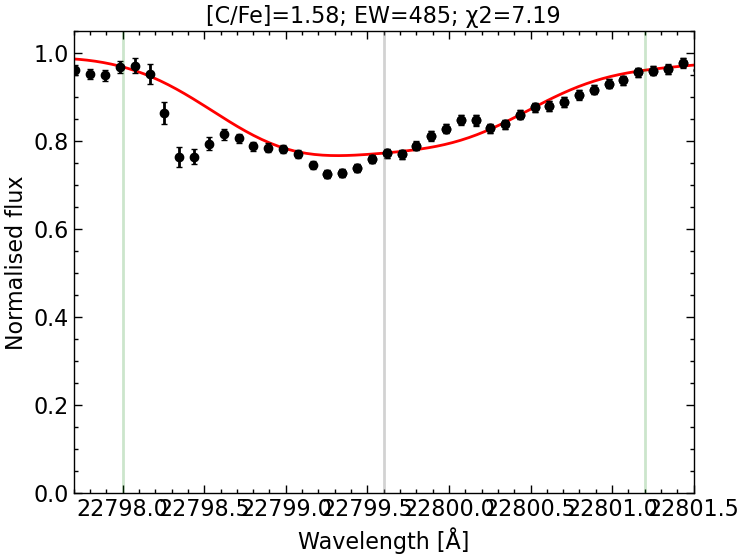

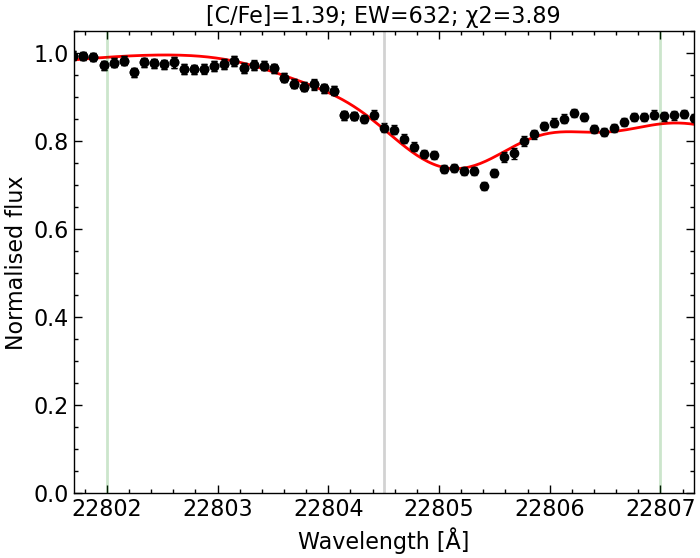

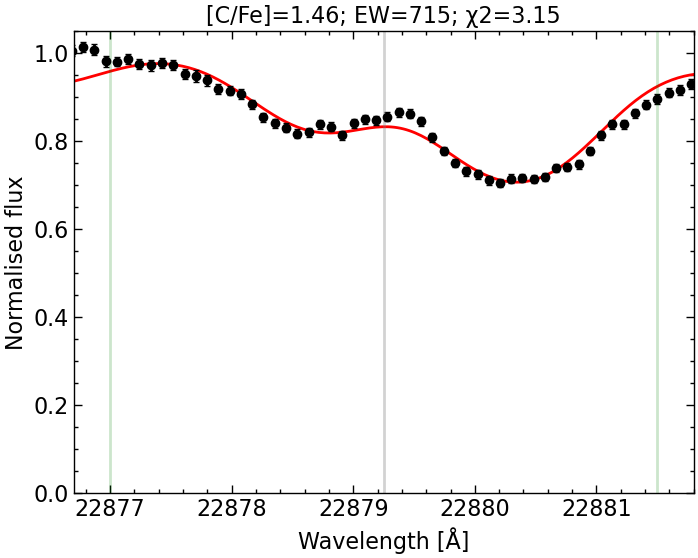

In [105]:
wavelength, flux, wavelength_observed_rv, flux_observed = plot_one_star(config_dict, 'ASAS-RCB-21', plot_title=True)

In [161]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21-2/Oct-16-2024-12-55-41_0.9399745473357757_LTE_N_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [162]:
np.mean(output_trimmed["chi_squared"])

np.float64(5.454192186583067)

In [163]:
np.mean(output_trimmed["chi_squared"])

np.float64(5.454192186583067)

In [164]:
(7.98+np.mean(output_trimmed['N_Fe'])).round(3), np.std(output_trimmed['N_Fe']).round(3)

(np.float64(9.078), np.float64(0.122))

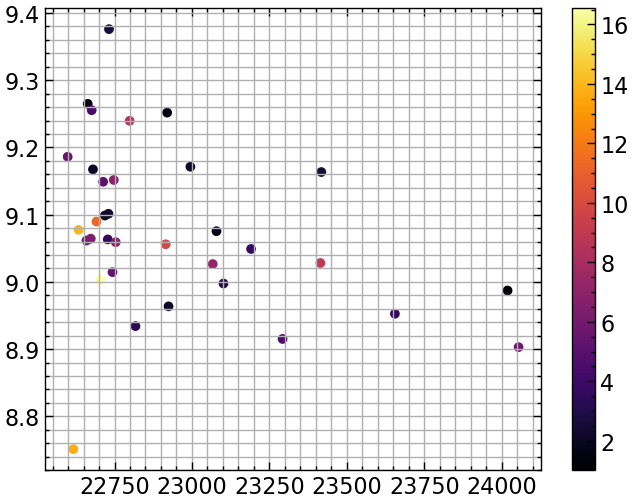

In [165]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['N_Fe']+7.98, c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.grid(which='both')
plt.colorbar()
# plt.axvline(2.322e4)


In [173]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21-2/Oct-16-2024-22-45-43_0.4548439834484921_LTE_O_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [174]:
output_trimmed

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,O_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,ASAS-RCB-21.txt,22942.25,22939.00,22945.5,0.1745,0.0,0.1486,7.0,5.4,0.0,15.989415,2274.0747,0,0
1,ASAS-RCB-21.txt,22947.40,22946.00,22948.8,0.4845,0.0,0.1346,7.0,5.4,0.0,5.629957,998.5633,0,0
2,ASAS-RCB-21.txt,22956.00,22954.00,22958.0,0.6680,0.0,0.1537,7.0,5.4,0.0,12.247978,1118.9088,0,0
3,ASAS-RCB-21.txt,22966.00,22964.60,22967.4,2.2165,0.0,0.0061,7.0,5.4,0.0,5.720129,983.8471,0,0
4,ASAS-RCB-21.txt,22971.30,22969.50,22973.1,-0.4537,0.0,0.1227,7.0,5.4,0.0,15.074126,1072.6535,0,0
5,ASAS-RCB-21.txt,22978.50,22976.70,22980.3,0.4253,0.0,0.2002,7.0,5.4,0.0,14.582251,1083.9152,0,0
6,ASAS-RCB-21.txt,22998.00,22996.00,23002.0,-0.0103,0.0,0.3504,7.0,5.4,0.0,12.030363,1021.8136,0,0
7,ASAS-RCB-21.txt,23006.20,23004.50,23007.9,0.8304,0.0,0.1553,7.0,5.4,0.0,17.313676,1088.3304,0,0
8,ASAS-RCB-21.txt,23015.25,23013.90,23016.6,-0.7179,0.0,0.1340,7.0,5.4,0.0,14.826889,926.5989,0,0
9,ASAS-RCB-21.txt,23304.50,23302.00,23307.0,0.7921,0.0,-0.0968,7.0,5.4,0.0,12.533215,1036.3496,0,0


In [175]:
# for i in range(len(output_trimmed)):
#     print(f"{output_trimmed['wave_center'].iloc[i]}  {output_trimmed['wave_start'].iloc[i]}  {output_trimmed['wave_end'].iloc[i]}")

In [176]:
np.mean(output_trimmed['O_Fe']).round(3)

np.float64(0.069)

In [177]:
(solar_abundances['O']+np.mean(output_trimmed['O_Fe'])).round(3), np.std(output_trimmed['O_Fe']).round(3)

(np.float64(8.839), np.float64(0.117))

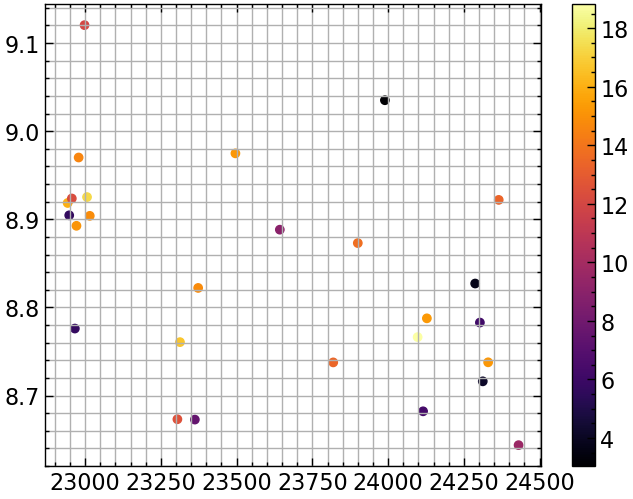

In [178]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['O_Fe']+solar_abundances['O'], c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.grid(which='both')
plt.colorbar()
# plt.axvline(2.322e4)
